In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import datetime

In [4]:
store = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')

In [5]:
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [18]:
store['Order Date']=pd.to_datetime(store['Order Date'], format='%m/%d/%Y')
store['Ship Date']=pd.to_datetime(store['Ship Date'], format='%m/%d/%Y')

In [19]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

# Average & Median Sales + Profit

In [29]:
# Avoid dividing by 0 by replacing 0 sales with NaN for profitability
store_clean = store.copy()
store_clean['Profitability'] = store_clean['Profit'] / store_clean['Sales']
store_clean['Profitability'] = store_clean['Profitability'].replace([float('inf'), -float('inf')], pd.NA)

In [31]:
avg_sales = store_clean['Sales'].mean()
avg_profit = store_clean['Profit'].mean()
profitability_percentage = store_clean['Profit'].sum() / store_clean['Sales'].sum()

med_sales = store_clean['Sales'].median()
med_profit = store_clean['Profit'].median()
median_percentage = store_clean['Profitability'].median()

print("Averages for Entire Dataset:")
print(f"Average Sales:        ${avg_sales:.2f}")
print(f"Average Profit:       ${avg_profit:.2f}")
print(f"Overall Profitability: {profitability_percentage:.3f}")

print("\nMedians for Entire Dataset:")
print(f"Median Sales:         ${med_sales:.2f}")
print(f"Median Profit:        ${med_profit:.2f}")
print(f"Median Profitability: {median_percentage:.3f}")

Averages for Entire Dataset:
Average Sales:        $229.86
Average Profit:       $28.66
Overall Profitability: 0.125

Medians for Entire Dataset:
Median Sales:         $54.49
Median Profit:        $8.67
Median Profitability: 0.270


### Dataset-Level Sales and Profitability Analysis
This difference between the averages and medians suggests that a small number of very large sales are pulling the averages up. Most transactions are smaller but tend to be more profitable based on the higher median profitability. Looking at both averages and medians gives a better picture of how the business is really performing overall.


# Top 20 States By Sales

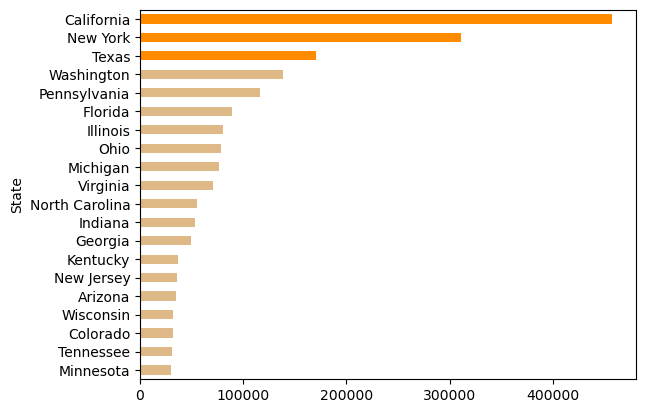

In [25]:
colors = ['burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood',
         'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'darkorange', 'darkorange', 'darkorange']
store.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Top 20 States by Profitability

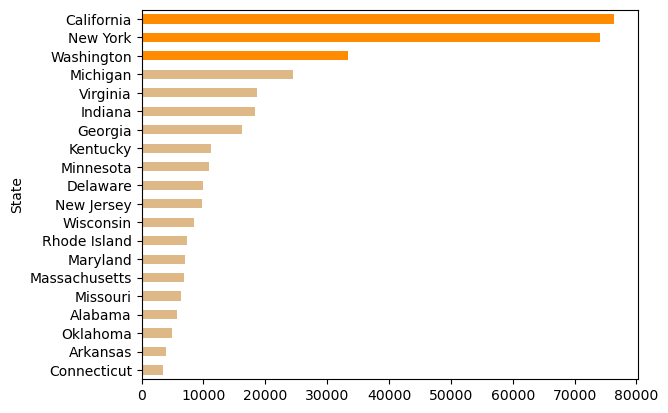

In [32]:
colors = ['burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood',
         'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'darkorange', 'darkorange', 'darkorange']
store.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Top 20 Cities by Sale

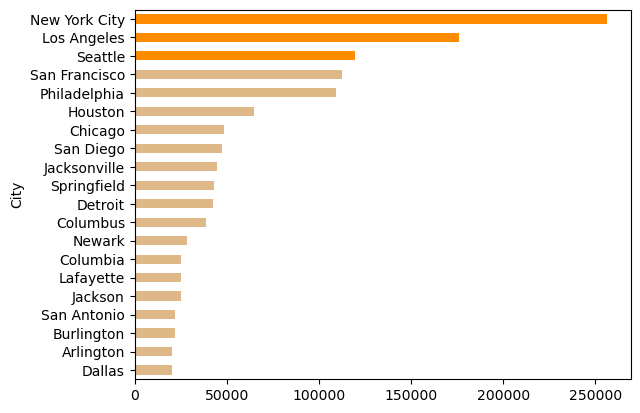

In [34]:
colors = ['burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood',
         'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'darkorange', 'darkorange', 'darkorange']
store.groupby('City')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Top 20 Cities by Profit

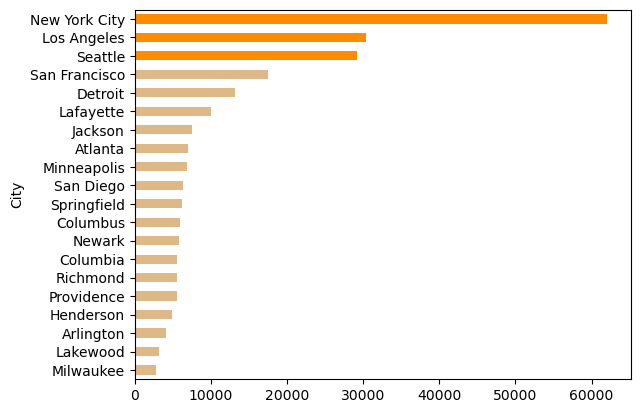

In [35]:
colors = ['burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood',
         'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'darkorange', 'darkorange', 'darkorange']
store.groupby('City')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Most and Least Profitiable Cities

In [37]:
# Calculate total sales and profit per city
city_ps = store.groupby('City')[['Sales', 'Profit']].sum()

# Calculate profitability
city_ps['Profitability'] = city_ps['Profit'] / city_ps['Sales']

#Dropping cities with 0 profitability 
city_ps = city_ps[city_ps['Profitability'] > 0]

city_sorted = city_ps.sort_values('Profitability', ascending=False)

top_10 = city_sorted.head(10)
bottom_10 = city_sorted.tail(10)

print("Top 10 Cities by Profitability:")
print(top_10[['Sales', 'Profit', 'Profitability']])

print("\nBottom 10 Cities by Profitability:")
print(bottom_10[['Sales', 'Profit', 'Profitability']])

Top 10 Cities by Profitability:
                Sales    Profit  Profitability
City                                          
Atlantic City   23.36   11.6800       0.500000
Grand Island    15.96    7.9800       0.500000
New Brunswick   14.77    7.1567       0.484543
Summerville    406.94  196.9132       0.483888
Holland        137.86   66.6588       0.483525
Lindenhurst     55.48   26.6304       0.480000
Antioch         19.44    9.3312       0.480000
Royal Oak       35.34   16.9632       0.480000
Davis           32.40   15.5520       0.480000
Bozeman         43.66   20.8106       0.476651

Bottom 10 Cities by Profitability:
                      Sales    Profit  Profitability
City                                                
Miramar           1531.1920   32.2810       0.021082
Port Saint Lucie   248.9500    4.4490       0.017871
Huntsville        9194.9868  161.8308       0.017600
Hillsboro           87.8380    1.5455       0.017595
Johnson City       765.8480   11.8562       0.0154

### Sales and Profitability Analysis Across Cities

The dataset shows an average sales of USD 229.86 and an average profit of USD 28.66, with an overall profitability ratio of 0.125. Median values (sales: USD 54.49, profit: USD 8.67, profitability: 0.270) suggest a skewed distribution, where a few high-sales cities raise the averages.

**Top 10 Cities by Profitability:**  
Cities such as Atlantic City and Grand Island have moderate sales but high profitability ratios between 0.48 and 0.50, indicating efficient profit generation. Summerville stands out with high sales and similarly strong profitability near 0.48.

**Bottom 10 Cities by Profitability:**  
Cities like Huntsville and Pasadena report large sales but very low profitability ratios below 0.02, highlighting inefficiencies despite high revenue.

**Conclusion:**  
High sales do not always equate to high profitability. Considering profitability ratios alongside sales helps guide strategic decisions to improve overall performance.

### Analysis of Top Customers and Profitability Across Customer Segments

This analysis examines the average profit generated across different customer segments to investigate potential relationships between segmentation and profitability. Additionally, the Pareto Principle (80/20 Rule) is applied to determine whether a small subset of customers accounts for the majority of total profit.

# Top 20 Customers by Profit

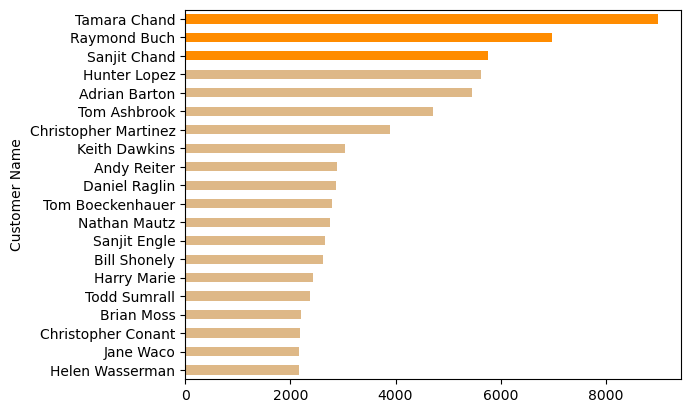

In [6]:
colors = ['burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood',
         'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'burlywood', 'darkorange', 'darkorange', 'darkorange']
store.groupby('Customer Name')['Profit'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

# Average Profit by Customer Segment

Segment
Home Office    33.818664
Corporate      30.456667
Consumer       25.836873
Name: Profit, dtype: float64


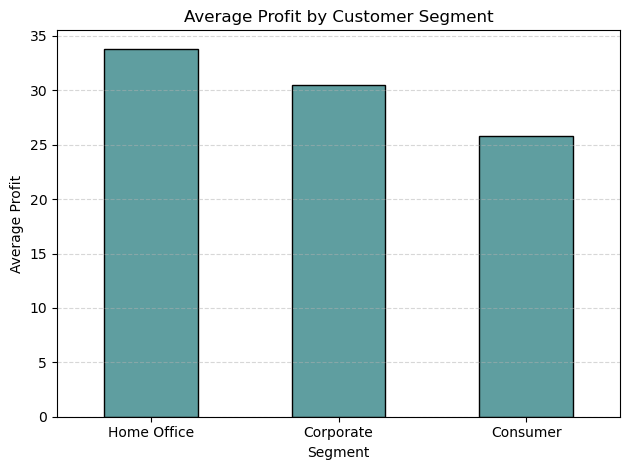

In [7]:
import matplotlib.pyplot as plt

# Group by Segment and calculate average profit
avg_profit_by_segment = store.groupby('Segment')['Profit'].mean().sort_values(ascending=False)

print(avg_profit_by_segment)

#plotting the results 
avg_profit_by_segment.plot(kind='bar', color='cadetblue', edgecolor='black')
plt.title('Average Profit by Customer Segment')
plt.ylabel('Average Profit')
plt.xlabel('Segment')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Applying Pareto Principle to customers and profit

In [8]:
store2 = pd.DataFrame(store.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False))

In [9]:
store2.quantile(0.7, interpolation='higher')

Profit    463.269
Name: 0.7, dtype: float64

In [11]:
store2[store2['Profit']>=463.269].sum()/store['Profit'].sum()

Profit    0.971351
dtype: float64

### 🧾 Customer Profitability Analysis

The analysis reveals that the **top 30% of customers account for approximately 97% of total profit**. This significant concentration of profitability highlights the importance of **prioritizing relationship management, personalized engagement, and retention strategies** for these high-value customers in order to drive sustained business growth and long-term profitability.

### Evaluation of Product Sub-Categories Based on Sales and Profit Performance

This analysis aims to assess product sub-categories by examining both their sales volumes and profitability metrics. The objective is to:

- Identify high-performing segments that contribute significantly to revenue and profit growth.
- Highlight underperforming or unprofitable categories that may necessitate strategic review and corrective actions.

# Sub Categories by Sales

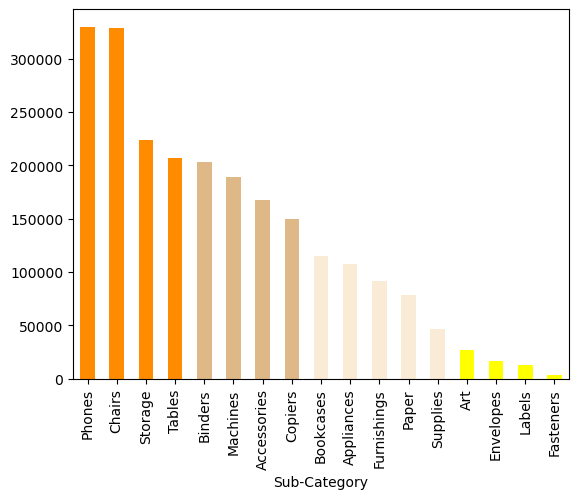

In [12]:
colors = ['darkorange', 'darkorange', 'darkorange', 'darkorange','burlywood','burlywood','burlywood','burlywood','antiquewhite','antiquewhite',
         'antiquewhite', 'antiquewhite', 'antiquewhite', 'yellow','yellow','yellow','yellow']
store.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False).plot.bar(color=colors);

# Sub Categories by Profit

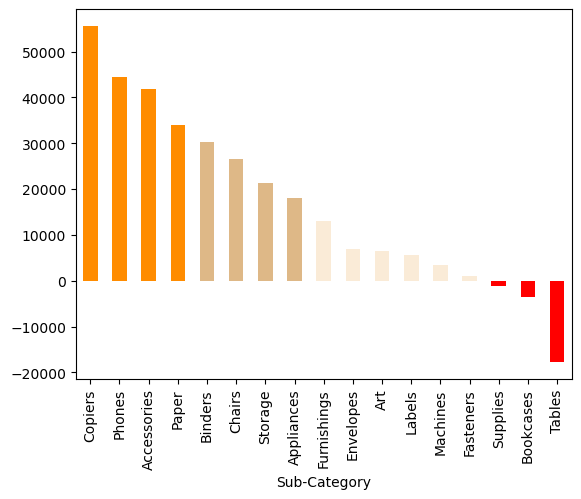

In [14]:
colors = ['darkorange', 'darkorange', 'darkorange', 'darkorange','burlywood','burlywood','burlywood','burlywood','antiquewhite','antiquewhite',
         'antiquewhite', 'antiquewhite', 'antiquewhite', 'antiquewhite','red','red','red']
store.groupby('Sub-Category')['Profit'].sum().sort_values(ascending=False).plot.bar(color=colors);

### 📊 Sales vs Profitability Insights

The visualizations indicate that while sub-categories such as **Copiers**, **Paper**, and **Accessories** do not rank among the top three in sales, they consistently appear among the top four in terms of profitability. This suggests these products benefit from **strong profit margins** and presents a strategic opportunity for the company to **scale these sub-categories** particularly **Paper** to further enhance overall profitability.

In contrast, **Tables**, despite generating the **fourth-highest sales**, incurs **significant losses**. Since shipping costs have been ruled out as a major contributor, the discrepancy likely stems from **aggressive discounting** or other internal pricing factors. Further investigation is warranted to determine the root causes and identify appropriate corrective actions.

# Shipping prices for tables vs all products

In [16]:
# Shipping mode distribution for Tables
tables_store = store[store['Sub-Category'] == 'Tables']
tables_shipping = tables_store['Ship Mode'].value_counts(normalize=True) * 100

# Shipping mode distribution for total dataset
total_shipping = store['Ship Mode'].value_counts(normalize=True) * 100

# Combine into one DataFrame for easy comparison
shipping_compare = pd.DataFrame({
    'Tables (%)': tables_shipping,
    'All Products (%)': total_shipping
}).fillna(0)

print(shipping_compare)

                Tables (%)  All Products (%)
Ship Mode                                   
Standard Class   59.561129         59.715829
Second Class     19.122257         19.461677
First Class      14.733542         15.389234
Same Day          6.583072          5.433260


### Analysis of Shipping Mode and Profitability in Product Sub-Categories

The analysis reveals minimal variation in shipping mode distribution between Tables and other product categories, indicating that shipping method is unlikely to be the primary driver of lower profitability. This suggests that excessive discounting may be a significant factor contributing to the negative profit performance of this sub-category and warrants further investigation.

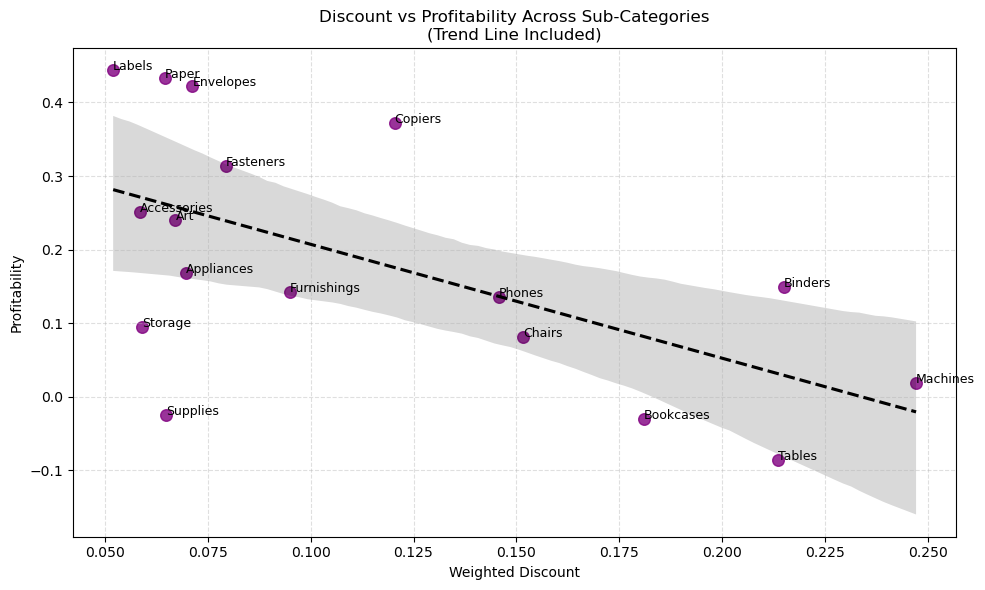

In [18]:
import warnings
warnings.filterwarnings('ignore')

# Group by Sub-Category and compute metrics
grouped = store.groupby('Sub-Category').apply(
    lambda g: pd.Series({
        'Weighted Discount': (g['Discount'] * g['Sales']).sum() / g['Sales'].sum(),
        'Profitability': g['Profit'].sum() / g['Sales'].sum()
    })
).reset_index()

# Plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=grouped,
    x='Weighted Discount',
    y='Profitability',
    scatter_kws={'s': 70, 'color': 'purple'},
    line_kws={'color': 'black', 'linestyle': '--'}
)

# Annotate sub-category names
for _, row in grouped.iterrows():
    plt.text(row['Weighted Discount'], row['Profitability'], row['Sub-Category'], fontsize=9)

plt.title('Discount vs Profitability Across Sub-Categories\n(Trend Line Included)')
plt.xlabel('Weighted Discount')
plt.ylabel('Profitability')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### 📉 Discount vs Profitability Analysis

The scatter plot titled **“Discount vs Profitability Across Sub-Categories”** reveals a clear negative correlation between weighted discount and profitability. In general, as discount rates increase, profitability tends to decline across most sub-categories.

Sub-categories such as **Labels**, **Paper**, **Envelopes**, and **Copiers** demonstrate high profitability with relatively low average discounts, indicating strong margins and effective pricing strategies.

**Tables** is the **least profitable sub-category**, despite ranking among the top in sales volume. It also has one of the highest average discounts. Given that shipping costs have been ruled out as a major factor, this suggests that **aggressive discounting is the primary driver of its negative profitability**, highlighting a need for immediate review of its pricing strategy.

**Machines** and **Bookcases** show similar patterns, with high discounts and low to negative profitability, making them additional candidates for strategic pricing reassessment.

**Binders**, while subject to relatively high discounts, still maintains moderate profitability. This is likely due to **its lower cost structure**, allowing it to absorb discounts more effectively without significantly impacting margins.

---

### ✅ Conclusion

This analysis reinforces that excessive discounting can erode profit margins, especially for higher-cost items. To improve overall profitability, it is essential to reevaluate pricing and discounting strategies—particularly for **Tables**, which exhibits the most significant loss despite high sales performance.